## First Trials

This data used input vectors of 16384 floats and mapped the results to a vector of 12228 for each thread block. ** need to verify

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----- Load the data -----
dataPath = '../Data/saxpyData/realMaxTests/'

# First experiment
no_shared1 = pd.read_csv(dataPath+'saxpyMax1.csv')
shared1 = pd.read_csv(dataPath+'saxpyMaxShared1.csv')

# rename cols
no_shared1.columns = ['start', 'end']
shared1.columns = ['start', 'end']

# interval column
no_shared1['interval'] = no_shared1['end'] - no_shared1['start']
shared1['interval'] = shared1['end'] - shared1['start']

# Second experiment
no_shared2 = pd.read_csv(dataPath+'saxpyMax2.csv')
shared2 = pd.read_csv(dataPath+'saxpyMaxShared2.csv')

# rename cols
no_shared2.columns = ['start', 'end']
shared2.columns = ['start', 'end']

# interval column
no_shared2['interval'] = no_shared2['end'] - no_shared2['start']
shared2['interval'] = shared2['end'] - shared2['start']

# Third experiment
no_shared3 = pd.read_csv(dataPath+'saxpyMax3.csv')
shared3 = pd.read_csv(dataPath+'saxpyMaxShared3.csv')

# rename cols
no_shared3.columns = ['start', 'end']
shared3.columns = ['start', 'end']

# interval column
no_shared3['interval'] = no_shared3['end'] - no_shared3['start']
shared3['interval'] = shared3['end'] - shared3['start']


# ----- Accumulate all intervals -----
import numpy as np

# Rescale to microseconds
all_ivls = (no_shared1['interval']/1000).to_list() + (no_shared2['interval']/1000).to_list() + (no_shared3['interval']/1000).to_list()
all_ivls_shared = (shared1['interval']/1000).to_list() + (shared2['interval']/1000).to_list() + (shared3['interval']/1000).to_list()
# all_ivls = (no_shared1['interval']).to_list() + (no_shared2['interval']).to_list() + (no_shared3['interval']).to_list()
# all_ivls_shared = (shared1['interval']).to_list() + (shared2['interval']).to_list() + (shared3['interval']).to_list()

# ----- Get 5-number distribution summary -----
sum_no_shared =  np.percentile(all_ivls, [0, 25, 50, 75, 100], method='midpoint')

# Print the 5-number summaries
print('No Shared Memory:\n-----------------')
print("Minimum:", sum_no_shared[0])
print("Q1:", sum_no_shared[1])
print("Median:", sum_no_shared[2])
print("Q3:", sum_no_shared[3])
print("Maximum:", sum_no_shared[4])
print('-----------------\n')

print('Shared Memory:\n-----------------')
sum_shared = np.percentile(all_ivls_shared, [0, 25, 50, 75, 100], method='midpoint')
print("Minimum:", sum_shared[0])
print("Q1:", sum_shared[1])
print("Median:", sum_shared[2])
print("Q3:", sum_shared[3])
print("Maximum:", sum_shared[4])
print('-----------------')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
No Shared Memory:
-----------------
Minimum: 1014.858
Q1: 1014.886
Median: 1015.893
Q3: 1015.91
Maximum: 5122.478
-----------------

Shared Memory:
-----------------
Minimum: 1014.883
Q1: 1014.889
Median: 1015.91
Q3: 1015.913
Maximum: 5122.566
-----------------


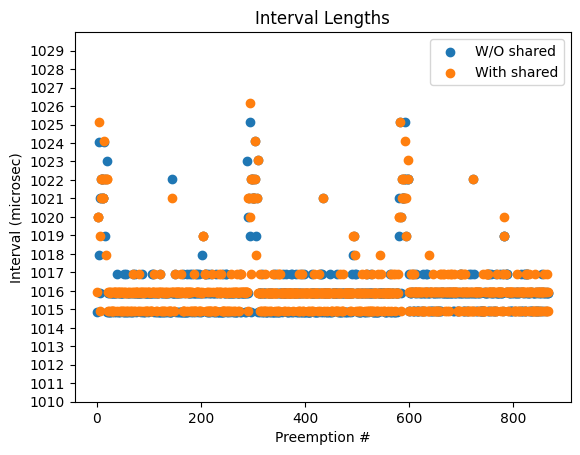

In [2]:

# ----- Plot the data -----
NUM_SAMPLES = 290

# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls_shared, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (microsec)')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1.01*1e3, 1.03*1e3)

plt.yticks(range(1010, 1030))

# Show the plot
plt.show()

# **Spaced Intervals**

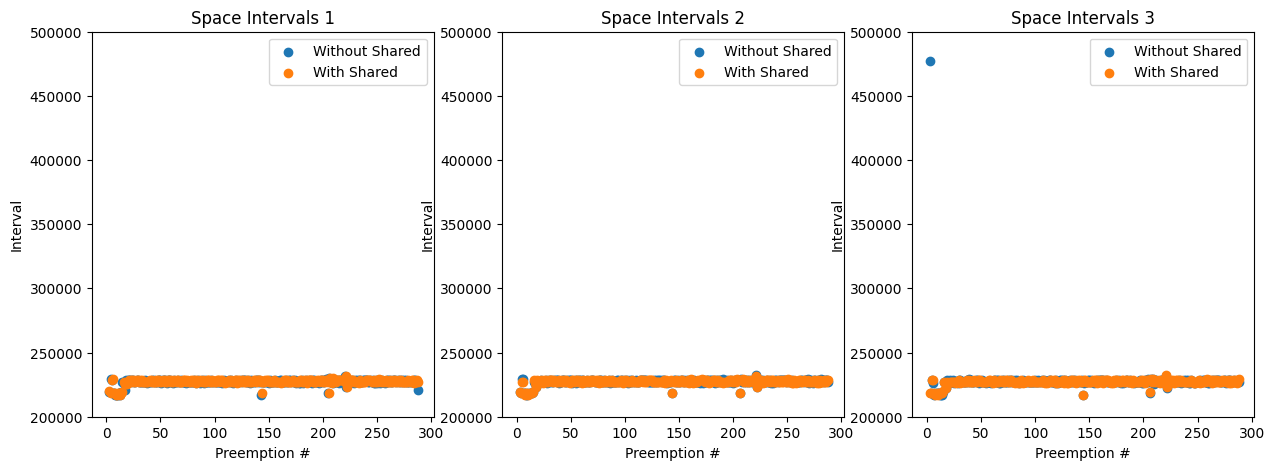

In [44]:
### Other interval version
# Get the interval between the start time and the previous stop time
no_shared_ivls_1 = []
shared_ivls_1 = []
no_shared_ivls_2 = []
shared_ivls_2 = []
no_shared_ivls_3 = []
shared_ivls_3 = []
for i in range(0, len(shared1)-1):
  no_shared_ivls_1.append(no_shared1['start'][i+1] - no_shared1['end'][i])
  shared_ivls_1.append(shared1['start'][i+1] - shared1['end'][i])
  no_shared_ivls_2.append(no_shared2['start'][i+1] - no_shared2['end'][i])
  shared_ivls_2.append(shared2['start'][i+1] - shared2['end'][i])
  no_shared_ivls_3.append(no_shared3['start'][i+1] - no_shared3['end'][i])
  shared_ivls_3.append(shared3['start'][i+1] - shared3['end'][i])

# Make subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a scatter plot
ax1.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_1, label='Without Shared')
ax1.scatter(range(1, NUM_SAMPLES-1), shared_ivls_1, label='With Shared')

# Add labels and title
ax1.set_xlabel('Preemption #')
ax1.set_ylabel('Interval')
ax1.set_title('Space Intervals 1')

# Add legend
ax1.legend()

# Second plot
ax2.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_2, label='Without Shared')
ax2.scatter(range(1, NUM_SAMPLES-1), shared_ivls_2, label='With Shared')

# # Add labels and title
ax2.set_xlabel('Preemption #')
ax2.set_ylabel('Interval')
ax2.set_title('Space Intervals 2')

# Add legend
ax2.legend()

# Third plot
ax3.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_3, label='Without Shared')
ax3.scatter(range(1, NUM_SAMPLES-1), shared_ivls_3, label='With Shared')

# Add labels and title
ax3.set_xlabel('Preemption #')
ax3.set_ylabel('Interval')
ax3.set_title('Space Intervals 3')

# Add legend
ax3.legend()


# # Set y-axis limits
ax1.set_ylim(0.2*1e6, 0.5*1e6)
ax2.set_ylim(0.2*1e6, 0.5*1e6)
ax3.set_ylim(0.2*1e6, 0.5*1e6)

# Show the plot
plt.show()

### Zoomed in

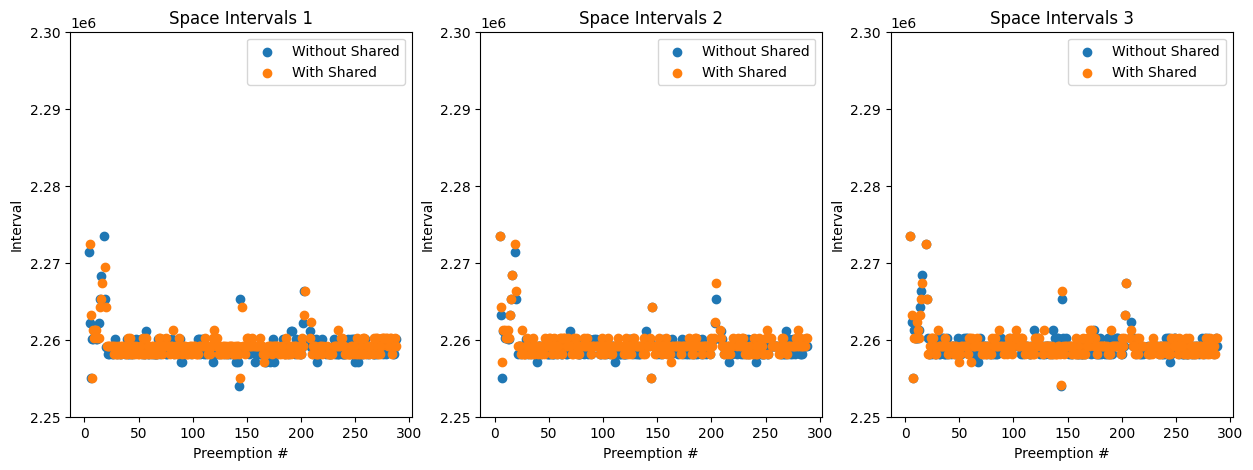

In [37]:
### Other interval version
# Get the interval between the start time and the previous stop time
# Make subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a scatter plot
ax1.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_1, label='Without Shared')
ax1.scatter(range(1, NUM_SAMPLES-1), shared_ivls_1, label='With Shared')

# Add labels and title
ax1.set_xlabel('Preemption #')
ax1.set_ylabel('Interval')
ax1.set_title('Space Intervals 1')

# Add legend
ax1.legend()

# Second plot
ax2.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_2, label='Without Shared')
ax2.scatter(range(1, NUM_SAMPLES-1), shared_ivls_2, label='With Shared')

# # Add labels and title
ax2.set_xlabel('Preemption #')
ax2.set_ylabel('Interval')
ax2.set_title('Space Intervals 2')

# Add legend
ax2.legend()

# Third plot
ax3.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls_3, label='Without Shared')
ax3.scatter(range(1, NUM_SAMPLES-1), shared_ivls_3, label='With Shared')

# Add labels and title
ax3.set_xlabel('Preemption #')
ax3.set_ylabel('Interval')
ax3.set_title('Space Intervals 3')

# Add legend
ax3.legend()


# # Set y-axis limits
ax1.set_ylim(2.25*1e6, 2.3e6)
ax2.set_ylim(2.25*1e6, 2.3*1e6)
ax3.set_ylim(2.25*1e6, 2.3*1e6)

# Show the plot
plt.show()

### Check to make sure intervals are different

In [40]:
print('Shared 1 Checks:\n---------------')
for i in range(1, 4):
  exec(f"print(np.sum(shared1 == shared{i}))")
print('---------------\n\nShared 2 Checks:\n---------------')
for i in range(1, 4):
  exec(f"print(np.sum(shared2 == shared{i}))")
print('---------------\n\nShared 3 Checks:\n---------------')
for i in range(1, 4):
  exec(f"print(np.sum(shared3 == shared{i}))")

Shared 1 Checks:
---------------
start       289
end         289
interval    289
dtype: int64
start       0
end         0
interval    0
dtype: int64
start       0
end         0
interval    0
dtype: int64
---------------

Shared 2 Checks:
---------------
start       0
end         0
interval    0
dtype: int64
start       289
end         289
interval    289
dtype: int64
start       0
end         0
interval    0
dtype: int64
---------------

Shared 3 Checks:
---------------
start       0
end         0
interval    0
dtype: int64
start       0
end         0
interval    0
dtype: int64
start       289
end         289
interval    289
dtype: int64


#### Without shared memory

In [41]:
print('No Shared 1 Checks:\n---------------')
for i in range(1, 4):
  exec(f"print(np.sum(no_shared1 == no_shared{i}))")
print('---------------\n\nNo Shared 2 Checks:\n---------------')
for i in range(1, 4):
  exec(f"print(np.sum(no_shared2 == no_shared{i}))")
print('---------------\n\nSNo hared 3 Checks:\n---------------')
for i in range(1, 4):
  exec(f"print(np.sum(no_shared3 == no_shared{i}))")

No Shared 1 Checks:
---------------
start       289
end         289
interval    289
dtype: int64
start       0
end         0
interval    0
dtype: int64
start       0
end         0
interval    0
dtype: int64
---------------

No Shared 2 Checks:
---------------
start       0
end         0
interval    0
dtype: int64
start       289
end         289
interval    289
dtype: int64
start       0
end         0
interval    0
dtype: int64
---------------

SNo hared 3 Checks:
---------------
start       0
end         0
interval    0
dtype: int64
start       0
end         0
interval    0
dtype: int64
start       289
end         289
interval    289
dtype: int64


##### All of the data are different